In [9]:
%%time

import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split


"""
CARGAR DATOS NO REDUCIDOS
"""
"""
#train = pd.read_csv('wtf2.csv').values
#test = pd.read_csv('test2.csv').values
trainX = train[:,1:5]
trainY = train[:,5]
testX = test[:,1:5]
testY = test[:,5]

"""
"""
CARGAR DATOS REDUCIDOS
"""

data = pd.read_csv('hollow.csv').values

data = data[1:,1:]
trainX, testX, trainY, testY = train_test_split(
    data[:,:4], data[:,4], test_size=0.33, random_state=42)
print(trainX.shape)
print(trainY.shape)



(2380084, 4)
(2380084,)
Wall time: 30 s


In [10]:
%%time

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

print(__doc__)

# Scaling set and erasing outliers
scaler = StandardScaler()

scaler.fit(trainX)
trainXS = scaler.transform(trainX)

trainXS = np.c_[trainXS, np.transpose(trainY)]

print(trainXS.shape)
trainXS= trainXS[np.where((-3 <= trainXS[:,0]) & (trainXS[:,0] <= 3)
       & (-3 <= trainXS[:,1]) & (trainXS[:,1] <= 3)
       & (-3 <= trainXS[:,2]) & (trainXS[:,2] <= 3)                                         
       & (-3 <= trainXS[:,3]) & (trainXS[:,3] <= 3))]

trainY = trainXS[:,4]
trainXS = trainXS[:,:4]
print(trainXS.shape)


lab_enc = LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(trainY)




clf = SGDClassifier(alpha = 0.0001, max_iter = 20, class_weight = 'balanced')
clf.fit(trainXS,training_scores_encoded)



Old graph interface where function orientation was used

fig=plt.figure(figsize=(8,6))
fig.suptitle('Resultados imagen 194', fontsize=14)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

#NO ESTANDAR
img = putis
fig.add_subplot(221)
plt.imshow(img)


#ESTANDAR
img = putisima
fig.add_subplot(222)
plt.imshow(img)


#resultado
img = res.values.reshape(240,155).astype(float)
fig.add_subplot(223)
plt.imshow(img)

#img completa
img = vistima.values.reshape(240,155).astype(float)
fig.add_subplot(224)
plt.imshow(img)
plt.show()

(2380084, 5)
(2269643, 4)
Wall time: 13.7 s


In [ ]:
%%time

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

print(__doc__)

# Scaling set and erasing outliers
scaler = StandardScaler()

scaler.fit(trainX)
trainXS = scaler.transform(trainX)

trainXS = np.c_[trainXS, np.transpose(trainY)]

print(trainXS.shape)
trainXS= trainXS[np.where((-3 <= trainXS[:,0]) & (trainXS[:,0] <= 3)
       & (-3 <= trainXS[:,1]) & (trainXS[:,1] <= 3)
       & (-3 <= trainXS[:,2]) & (trainXS[:,2] <= 3)                                         
       & (-3 <= trainXS[:,3]) & (trainXS[:,3] <= 3))]

trainY = trainXS[:,4]
trainXS = trainXS[:,:4]
print(trainXS.shape)

lab_enc = LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(trainY)

print(trainY)

# Set the parameters by cross-validation
tuned_parameters = [{'class_weight': [None, 'balanced'], 'alpha': [1e-3, 1e-4], 'max_iter':[5,10,20]}]

scores = ['precision']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(trainXS, training_scores_encoded)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    lab_enc = LabelEncoder()
    

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = testY, clf.predict(scaler.fit_transform(testX))
    
    test_scores_encoded = lab_enc.fit_transform(y_true)
    print(classification_report(test_scores_encoded ,y_pred))
    print(confusion_matrix(test_scores_encoded , y_pred))  
    
    print()


Automatically created module for IPython interactive environment


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(7385144, 5)
(7057227, 4)
[0.0 0.0 0.0 ... 0.0 0.0 0.0]
# Tuning hyper-parameters for precision



In [26]:
from sklearn.metrics import classification_report, confusion_matrix  

y_true, y_pred = testY, clf.predict(scaler.fit_transform(testX))
#print(classification_report(y_true, y_pred))
print(y_pred)
lab_enc = LabelEncoder()
test_scores_encoded = lab_enc.fit_transform(y_true)

y_pred = clf.predict(testX)#recalcular sin estandarizar
#y_pred = clf.predict(scaler.fit_transform(testX))

print(classification_report(test_scores_encoded ,y_pred))
print(confusion_matrix(test_scores_encoded , y_pred))  

[0 0 1 ... 0 1 0]
             precision    recall  f1-score   support

          0       0.92      0.70      0.79    936999
          1       0.38      0.74      0.50    235282

avg / total       0.81      0.71      0.73   1172281

[[653828 283171]
 [ 60473 174809]]


In [4]:
import os
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def getcut(data, index, col, mod='seg'):
    index = index % 210
    
    name = data.iat[index,0]
    name = '..\dataset\HGG\\' + name + '\\' + name + '_' + mod + '.nii.gz'
    
    
    value = data.iat[index, col]
    layer = data.iat[index,col]
    
    img = nib.load(name)
    cut = img.get_fdata()
    img.uncache()
    
    
    if(col == 1 or col == 'cor'):
        cut = cut[layer,:,:]
    elif(col == 2 or col == 'sag'):
        cut = cut[:,layer,:]
    elif(col == 3 or col == 'hor'):
        cut = cut[:,:,layer]
    else:
        cut = cut[layer,:,:]
    
    
    return cut

def extractPointsToDF(source, destination, index, col):
    """
    Extraer los puntos del corte designado de una MRI y agregarlos
    a el dataframe destination
    """
    
    T1 = getcut(source,index,col,mod='t1')
    T2 = getcut(source,index,col,mod='t2')
    T1C = getcut(source,index,col,mod='t1ce')
    FLAIR = getcut(source,index,col,mod='flair')
    RES = getcut(source,index,col)
    
    
    T1 = T1.flatten()
    T2 = T2.flatten()
    T1C = T1C.flatten()
    FLAIR = FLAIR.flatten()    
    RES = RES.flatten()
    

    
    name = [None]

    
    for i in range(T1.shape[0]):
         name.append(source.iat[index,0])
    
    name = name[1:]

    name = np.expand_dims(name, axis=0)
    T1 = np.expand_dims(T1, axis=0)
    T2 = np.expand_dims(T2, axis=0)
    T1C = np.expand_dims(T1C,axis=0)
    FLAIR = np.expand_dims(FLAIR,axis=0)
    RES = np.expand_dims(RES,axis=0)
    
    aux = np.concatenate((name,T1,T1C,T2,FLAIR,RES),axis=0)
    aux = np.transpose(aux)

  
    columns = ['NAME', 'T1','T1C','T2', 'FLAIR', 'RES']
    df = pd.DataFrame(data = aux, columns=columns)
    
    
    
    frames = [destination, df]
    destination = pd.concat(frames)
    
  
    
    return destination

def createPointsDF():
    columns = ['NAME', 'T1','T1C','T2', 'FLAIR', 'RES']
    df = pd.DataFrame(columns=columns)
    return df




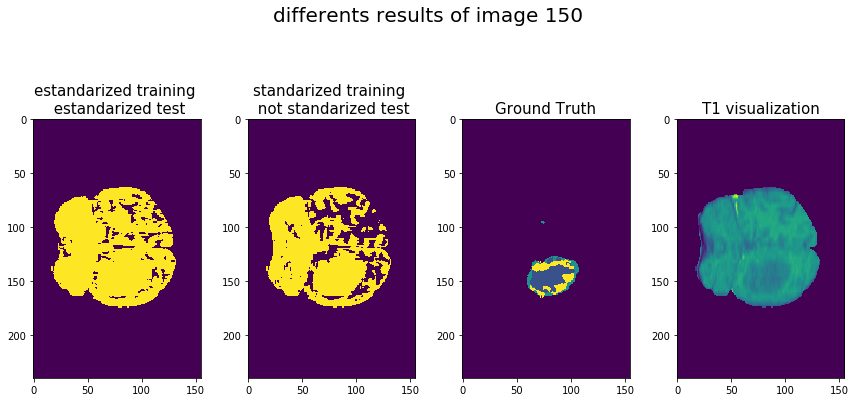

In [14]:
from __future__ import print_function


image_to_see = 150
peace = createPointsDF()
source = pd.read_csv('dataset.csv')
peace = extractPointsToDF(source,peace,image_to_see,2)

XTEST = peace.drop(['NAME','RES'],axis = 1)
vistima = peace.drop(['NAME','T1C','FLAIR','T2','RES'],axis = 1)
res = peace['RES']




#Not standarized training / not standarizd test
#YIS = lolo.predict(XTEST)
#putis = YIS.reshape(240,155).astype(float)

#standarized training / not standarized test
Y = clf.predict(XTEST) #ESTANDAR
putisima = Y.reshape(240,155).astype(float) #ESTANDAR


#estandarized training / estandarized test

pute = StandardScaler()
pute.fit(XTEST)
YIS = clf.predict(pute.transform(XTEST))
putis = YIS.reshape(240,155).astype(float)


#creando grafica
import matplotlib.pyplot as plt
%matplotlib inline

"""
Old graph interface where function orientation was used

fig=plt.figure(figsize=(8,6))
fig.suptitle('Resultados imagen 194', fontsize=14)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

#NO ESTANDAR
img = putis
fig.add_subplot(221)
plt.imshow(img)


#ESTANDAR
img = putisima
fig.add_subplot(222)
plt.imshow(img)


#resultado
img = res.values.reshape(240,155).astype(float)
fig.add_subplot(223)
plt.imshow(img)

#img completa
img = vistima.values.reshape(240,155).astype(float)
fig.add_subplot(224)
plt.imshow(img)
plt.show()
"""


fig, axs = plt.subplots(1, 4, figsize=(12,7))

axs[0].imshow(putis)
axs[0].set_title('estandarized training \n estandarized test', fontsize=15)

axs[1].imshow(putisima)
axs[1].set_title('standarized training \n not standarized test', fontsize=15)

axs[2].imshow(res.values.reshape(240,155).astype(float))
axs[2].set_title('Ground Truth', fontsize=15)

axs[3].imshow(vistima.values.reshape(240,155).astype(float))
axs[3].set_title('T1 visualization', fontsize=15)

fig.suptitle("differents results of image " + str(image_to_see),fontsize = 20)

fig.tight_layout()
plt.show()

